In [34]:
import pandas as pd
import numpy as np
from sklearn import metrics

import matplotlib.pyplot as plt

%matplotlib inline

1. Load the data :

Read the “housing.csv” file from the folder into the program.

Print first few rows of this data.

Extract input (X) and output (Y) data from the dataset.

In [35]:
#Read the “housing.csv” file from the folder into the program.
dfhousing = pd.read_excel("1553768847_housing.xlsx")

In [36]:
#Print first few rows of this data.
dfhousing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [37]:
dfhousing.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

The median house values are continuous and hence it is a regression problem
One of the column is a categorical feature (ocean_proximity)

In [38]:
# Extract input (X) and output (Y) data from the dataset.
#Separate features and labels
features = dfhousing.iloc[:,:-1].values
label = dfhousing.iloc[:,-1].values.reshape(-1,1)

In [39]:
features

array([[-122.23, 37.88, 41, ..., 126, 8.3252, 'NEAR BAY'],
       [-122.22, 37.86, 21, ..., 1138, 8.3014, 'NEAR BAY'],
       [-122.24, 37.85, 52, ..., 177, 7.2574, 'NEAR BAY'],
       ...,
       [-121.22, 39.43, 17, ..., 433, 1.7, 'INLAND'],
       [-121.32, 39.43, 18, ..., 349, 1.8672, 'INLAND'],
       [-121.24, 39.37, 16, ..., 530, 2.3886, 'INLAND']], dtype=object)

In [7]:
label

array([[452600],
       [358500],
       [352100],
       ...,
       [ 92300],
       [ 84700],
       [ 89400]], dtype=int64)

2. Handle missing values :

Fill the missing values with the mean of the respective column.

In [8]:
#check wheather there are any missing values or null
dfhousing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [9]:
#statistic of total_bedrooms column
print(dfhousing["total_bedrooms"].describe())

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


In [10]:
print(dfhousing.iloc[:,4:5].head())

   total_bedrooms
0           129.0
1          1106.0
2           190.0
3           235.0
4           280.0


In [11]:
#Fill the missing values with the mean of the respective column.
# Performing Imputation with strategy=mean
from sklearn.preprocessing import Imputer

In [12]:
imputerNaN = Imputer(missing_values="NaN",strategy="mean",axis=0)

imputerNaN.fit(dfhousing.iloc[:,4:5])
dfhousing.iloc[:,4:5] = imputerNaN.transform(dfhousing.iloc[:,4:5])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
# Again check wheather there are any missing values or null
dfhousing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

3. Encode categorical data :

Convert categorical column in the dataset to numerical data.

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
#Convert categorical column in the dataset to numerical data.
#print(dfhousing["ocean_proximity"].value_counts())
dfhousing["ocean_proximity"] = LabelEncoder().fit_transform(dfhousing["ocean_proximity"])
dfhousing["ocean_proximity"].value_counts()
dfhousing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,1.165843,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,1.420662,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,1.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000


In [16]:
# Again Separate features and labels
features = dfhousing.iloc[:,:-1].values
label = dfhousing.iloc[:,-1].values.reshape(-1,1)

In [17]:
features

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  3.0000e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.0000e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.0000e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  1.0000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  1.0000e+00],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  1.0000e+00]])

In [18]:
label

array([[452600],
       [358500],
       [352100],
       ...,
       [ 92300],
       [ 84700],
       [ 89400]], dtype=int64)

In [19]:
X,y=features,label

4. Split the dataset : 

Split the data into 80% training dataset and 20% test dataset.

In [20]:
#Split the data into 80% training dataset and 20% test dataset.
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (16512, 9) and size 148608
X_test shape (4128, 9) and size 37152
y_train shape (16512, 1) and size 16512
y_test shape (4128, 1) and size 4128


5. Standardize data :

Standardize training and test datasets.

In [22]:
#Standardize training and test datasets.
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[ 1.27258656 -1.3728112   0.34849025  0.22256942  0.21122752  0.76827628
   0.32290591 -0.326196    2.00593172]
 [ 0.70916212 -0.87669601  1.61811813  0.34029326  0.59309419 -0.09890135
   0.6720272  -0.03584338  2.00593172]
 [-0.44760309 -0.46014647 -1.95271028 -0.34259695 -0.49522582 -0.44981806
  -0.43046109  0.14470145  2.00593172]
 [ 1.23269811 -1.38217186  0.58654547 -0.56148971 -0.40930582 -0.00743434
  -0.38058662 -1.01786438  2.00593172]
 [-0.10855122  0.5320839   1.14200767 -0.11956547 -0.25655915 -0.48587717
  -0.31496232 -0.17148831 -0.1124266 ]]
test data
[[ 2.85347282e-01  1.95100000e-01 -2.86323693e-01 -5.22861572e-01
  -1.49476515e-03 -3.03010896e-02 -3.70086730e-01 -1.15508475e+00
  -1.12426599e-01]
 [ 6.09747178e-02 -2.35490539e-01  1.10435019e-01  1.38415277e-01
  -1.49476515e-03  1.21850767e-01  2.20531996e-01 -7.08659050e-01
  -1.12426599e-01]
 [-1.42487026e+00  1.00947776e+00  1.85617335e+00  5.46309967e-01
  -1.49476515e-03 -1.02419310e-01  1.21539643e+00 -2.104

6. Perform Linear Regression : 

Perform Linear Regression on training data.

Predict output for test dataset using the fitted model.

Print root mean squared error (RMSE) from Linear Regression.

In [23]:
#Perform Linear Regression on training data.
from sklearn.linear_model import LinearRegression

linearRegModel = LinearRegression()

linearRegModel.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
#Predict output for test dataset using the fitted model
y_pred = linearRegModel.predict(X_test)
y_pred

array([[ 75616.18733782],
       [166419.13655163],
       [264751.07303087],
       ...,
       [439690.1127737 ],
       [130408.05181885],
       [175513.56755484]])

In [25]:
#Print root mean squared error (RMSE) from Linear Regression.

#print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
#print(np.sqrt(metrics.mean_squared_error(y_train,linearRegModel.predict(X_train))))

print("Root Mean Squared Error : {}".format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))


Root Mean Squared Error : 71098.69982050032


7. Perform Decision Tree Regression :

Perform Decision Tree Regression on training data.

Predict output for test dataset using the fitted model.

Print root mean squared error from Decision Tree Regression.

In [26]:
#Perform Decision Tree Regression on training data.
from sklearn.tree import DecisionTreeRegressor
dtReg = DecisionTreeRegressor(max_depth=5)
dtReg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [27]:
#Predict output for test dataset using the fitted model
dtReg_y_pred = dtReg.predict(X_test)
dtReg_y_pred

array([ 79530.1760355 , 104068.70697013, 367761.87222222, ...,
       488519.91384615, 104068.70697013, 254743.        ])

In [28]:
#Print root mean squared error from Decision Tree Regression.

print("Root Mean Squared Error is {}".format(np.sqrt(metrics.mean_squared_error(y_test,dtReg_y_pred))))

Root Mean Squared Error is 70879.2196382473


8. Perform Random Forest Regression :

Perform Random Forest Regression on training data.

Predict output for test dataset using the fitted model.

Print RMSE (root mean squared error) from Random Forest Regression.

In [29]:
#Perform Random Forest Regression on training data. 
from sklearn.ensemble import RandomForestRegressor
rfReg = RandomForestRegressor(30)
rfReg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [30]:
#Predict output for test dataset using the fitted model.
rfReg_y_pred = rfReg.predict(X_test)
rfReg_y_pred

array([ 53146.66666667,  70380.        , 466150.46666667, ...,
       496350.96666667,  70903.33333333, 162443.33333333])

In [31]:
# Print RMSE (root mean squared error) from Random Forest Regression.
print("Root Mean Squared Error is {}".format(np.sqrt(metrics.mean_squared_error(y_test,rfReg_y_pred))))

Root Mean Squared Error is 50658.85766589206


9. Bonus exercise: Perform Linear Regression with one independent variable :

Extract just the median_income column from the independent variables (from X_train and X_test).

Perform Linear Regression to predict housing values based on median_income.

Predict output for test dataset using the fitted model.

Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [46]:
#Extract just the median_income column from the independent variables (from X_train and X_test). 

X_test_mi = X_test[:,[7]]

X_train_mi=X_train[:,[7]]

In [48]:
#Perform Linear Regression to predict housing values based on median_income.
linReg_mi = LinearRegression()
linReg_mi.fit(X_train_mi,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
#Predict output for test dataset using the fitted model.
y_pred_mi = linReg_mi.predict(X_test_mi)

In [50]:
y_pred_mi

array([[114958.91676996],
       [150606.88213964],
       [190393.71844449],
       ...,
       [431500.77230409],
       [161245.49973085],
       [193412.95560084]])

No handles with labels found to put in legend.


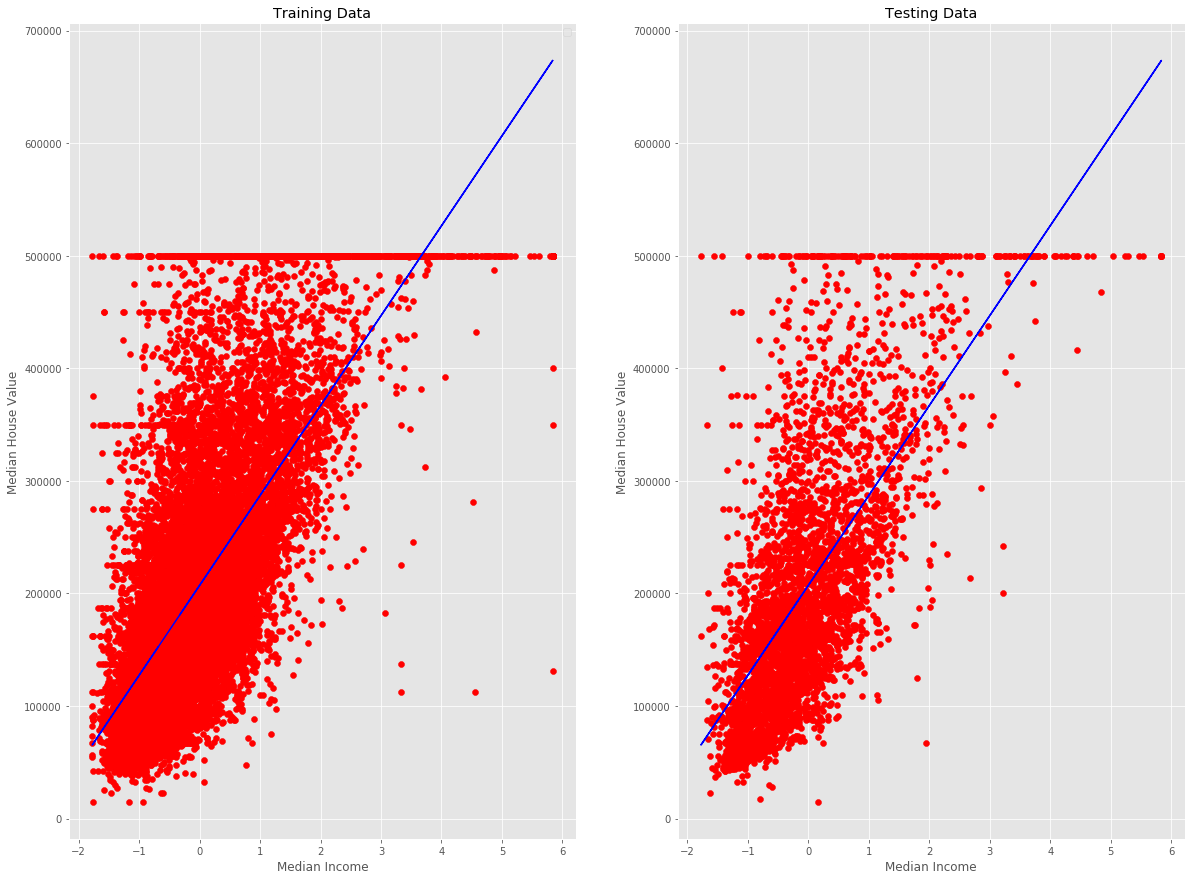

In [54]:
# Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.
plt.style.use("ggplot")
plt.figure(figsize=(20,15))

plt.subplot(1,2,1)
plt.title("Training Data")
plt.scatter(X_train_mi,y_train,color="red")
plt.plot(X_train_mi,linReg_mi.predict(X_train_mi),color="blue")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()

plt.subplot(1,2,2)
plt.title("Testing Data")
plt.scatter(X_test_mi,y_test,color="red")
plt.plot(X_test_mi,y_pred_mi,color="blue")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")

plt.show()





Observation : The independent varible is scattered so that we are getting less accurate results.